In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sejasa_df = pd.read_csv("sejasa.csv")

In [9]:
sejasa_df.head()

,web-scraper-order,name,pengalaman,rating,portofolio,deskripsi,logo-src,foto-src,layanan_lain,jangkauan,rating_user
0,1732002982-1,Yoga Konstruksi,1,1,0,Penyedia jasa bangun dan renovasi rumah,https://dm5360p8ab28j.cloudfront.net/assets/v1...,https://dm5360p8ab28j.cloudfront.net/assets/v1...,"['Renovasi Rumah', 'Pemasangan Atap', 'Kusen P...","['Tangerang Selatan', 'Tangerang Kota']",4
1,1732002990-2,Tukang Bangunan Bogor,3,1,6,Kami melayani Jasa pekerjaan sipil/bangunan b...,https://sejasa-production.s3.amazonaws.com/upl...,https://sejasa-production.s3.amazonaws.com/upl...,"['Renovasi Rumah', 'Pemasangan Atap', 'Kusen P...","['Bogor Kota', 'Bogor Kabupaten', 'Sukabumi', ...",3
2,1732002999-3,Tohaga Putra Mandiri cv.,0,1,5,Tohaga Putra Mandiri cv adalah perusahaan yan...,https://sejasa-production.s3.amazonaws.com/upl...,https://sejasa-production.s3.amazonaws.com/upl...,"['Renovasi Rumah', 'Pemasangan Atap', 'Kusen P...","['Sukabumi', 'Bogor Kota', 'Jakarta Timur', 'J...",3
3,1732003017-4,Takin Renovasi & Baja,2,1,1,"Kami menerima Jasa Pemasangan Atap, Plafon, In...",https://sejasa-production.s3.amazonaws.com/upl...,https://sejasa-production.s3.amazonaws.com/upl...,"['Renovasi Rumah', 'Pemasangan Atap', 'Kusen P...","['Jakarta Timur', 'Tangerang Selatan', 'Tanger...",5
4,1732003025-5,Suryabaru Konstruksi,2,1,1,Kami Suryabaru Konstruksi bergerak dalam bidan...,https://sejasa-production.s3.amazonaws.com/upl...,https://sejasa-production.s3.amazonaws.com/upl...,"['Kelistrikan', 'Renovasi Rumah', 'Pemasangan ...","['Surabaya', 'Sidoarjo', 'Situbondo', 'Pasurua...",4


In [10]:
sejasa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   web-scraper-order  1104 non-null   object
 1   name               1104 non-null   object
 2   pengalaman         1104 non-null   int64 
 3   rating             1104 non-null   int64 
 4   portofolio         1104 non-null   int64 
 5   deskripsi          1098 non-null   object
 6   logo-src           1103 non-null   object
 7   foto-src           1104 non-null   object
 8   layanan_lain       1104 non-null   object
 9   jangkauan          1104 non-null   object
 10  rating_user        1104 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 95.0+ KB


In [11]:
sejasa_df['deskripsi'].fillna('Tidak ada deskripsi', inplace=True)

C:\Users\LWNOVO\AppData\Local\Temp\ipykernel_18600\3185249000.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sejasa_df['deskripsi'].fillna('Tidak ada deskripsi', inplace=True)


In [12]:
sejasa_df['deskripsi'] = sejasa_df['deskripsi'].fillna('Tidak ada deskripsi')

In [13]:
sejasa_df.describe()

,pengalaman,rating,portofolio,rating_user
count,1104.000000,1104.000000,1104.000000,1104.000000
mean,21.191123,9.908514,3.428442,3.098732
std,49.363994,19.515848,4.815390,1.413649
min,0.000000,1.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000,2.000000
50%,4.000000,3.000000,2.000000,3.000000
75%,17.000000,9.000000,4.000000,4.000000
max,519.000000,235.000000,47.000000,5.000000


In [14]:
import pandas as pd

In [15]:
# Calculate skewness for specific columns
skewness = sejasa_df[['pengalaman', 'rating', 'portofolio']].skew()

# Display skewness values
print("Skewness:")
print(skewness)


Skewness:
pengalaman    4.789082
rating        4.965687
portofolio    3.980545
dtype: float64


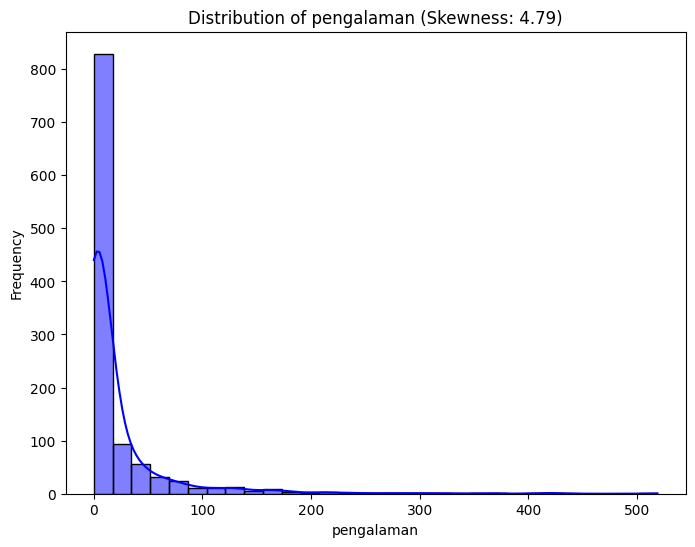

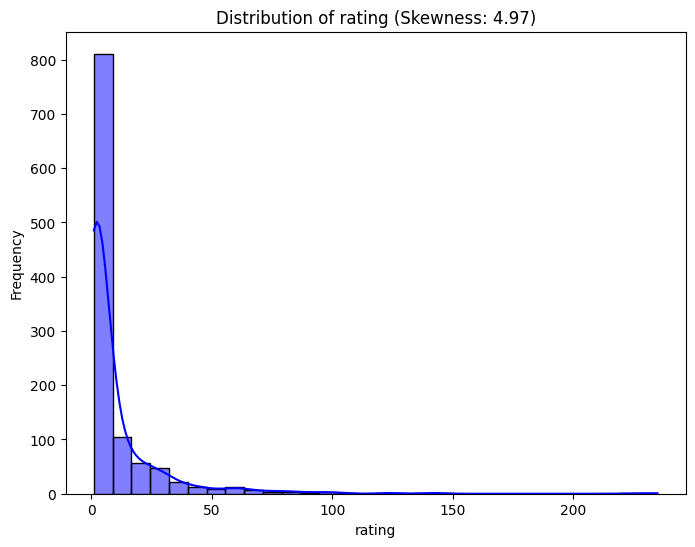

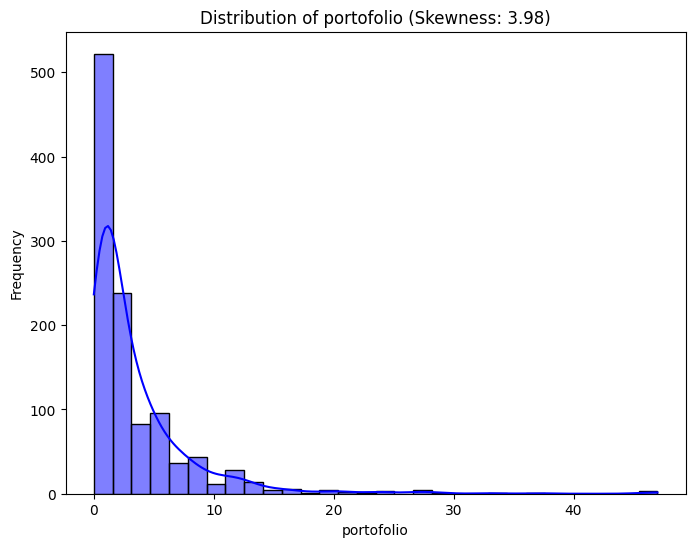

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['pengalaman', 'rating', 'portofolio']

# Plot distribution and skewness
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(sejasa_df[col], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {col} (Skewness: {sejasa_df[col].skew():.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [17]:
import numpy as np
sejasa_df['pengalaman'] = np.log1p(sejasa_df['pengalaman'])
sejasa_df['rating'] = np.log1p(sejasa_df['rating'])
sejasa_df['portofolio'] = np.log1p(sejasa_df['portofolio'])

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Pilih kolom untuk dinormalisasi
columns_to_normalize = ['pengalaman', 'rating', 'portofolio']

# Inisialisasi Min-Max Scaler
scaler = MinMaxScaler()

# Terapkan normalisasi
sejasa_df[columns_to_normalize] = scaler.fit_transform(sejasa_df[columns_to_normalize])

# Tampilkan dataset hasil normalisasi
print(sejasa_df.head())


  web-scraper-order                      name  pengalaman  rating  portofolio  \
0      1732002982-1           Yoga Konstruksi    0.110836     0.0    0.000000   
1      1732002990-2     Tukang Bangunan Bogor    0.221671     0.0    0.502663   
2      1732002999-3  Tohaga Putra Mandiri cv.    0.000000     0.0    0.462843   
3      1732003017-4     Takin Renovasi & Baja    0.175670     0.0    0.179052   
4      1732003025-5      Suryabaru Konstruksi    0.175670     0.0    0.179052   

                                           deskripsi  \
0            Penyedia jasa bangun dan renovasi rumah   
1  Kami melayani  Jasa pekerjaan sipil/bangunan b...   
2  Tohaga Putra Mandiri cv  adalah perusahaan yan...   
3  Kami menerima Jasa Pemasangan Atap, Plafon, In...   
4  Kami Suryabaru Konstruksi bergerak dalam bidan...   

                                            logo-src  \
0  https://dm5360p8ab28j.cloudfront.net/assets/v1...   
1  https://sejasa-production.s3.amazonaws.com/upl...   
2  https

In [19]:
sejasa_df.to_csv("main_data.csv", index=False)